# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - MATURIDADE_MUN

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp+cs-cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4644301,7885
1,2023,4637104,1569
2,2023,4647801,1219
3,2023,4647801,1219
4,2023,4647801,1219
...,...,...,...
85176660,1903,9430800,921
85176661,1901,9430800,8927
85176662,1901,9430800,8927
85176663,1901,6912500,6645


In [2]:
# CRIANDO A COLUNA 'ANO1' COM O VALOR MAIS ANTIGO (MIN) DE ANO DE ABERTURA DE CNAE_FISCAL_PRINCIPAL POR MUNICÍPIO:
df['ANO1'] = df.groupby('MUNICÍPIO')['DATA_DE_INÍCIO_ATIVIDADE'].transform('min')
df = df.sort_values('ANO1')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1
85176664,1891,1321900,4675,1891
41858394,2017,4520002,4675,1891
43278820,2016,1932200,4675,1891
83580330,1988,1412601,4675,1891
25700735,2020,5611205,4675,1891
...,...,...,...,...
12415696,2021,4399103,520,1997
12415695,2021,4399103,520,1997
47492534,2015,9602501,120,1997
13997320,2021,4723700,78,1997


In [3]:
# MATURIDADE_CP
# MATURIDADE_MUN

# Criando a variável maturidade para os CNAE_FISCAL_PRINCIPAL:
# df['MATURIDADE_CP'] = df['ANO'] - df['ANO1']
df['DATA_DE_INÍCIO_ATIVIDADE'] = df['DATA_DE_INÍCIO_ATIVIDADE'].astype(int)
df['ANO1'] = df['ANO1'].astype(int)
df['MATURIDADE_CP'] = df['DATA_DE_INÍCIO_ATIVIDADE'] - df['ANO1']

# Agrupar por município e encontrar o maior valor de maturidade em cada grupo para termos a MATURIDADE_MUN

maturidade_mun = df.groupby('MUNICÍPIO')['MATURIDADE_CP'].max()

# Converter a série em DataFrame
df_maior_maturidade = pd.DataFrame({'MUNICÍPIO': maturidade_mun.index,
                                    'MATURIDADE_MUN': maturidade_mun.values})

# Mesclar o DataFrame original com o DataFrame da menor maturidade
df = pd.merge(df, df_maior_maturidade, on='MUNICÍPIO', how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1,MATURIDADE_CP,MATURIDADE_MUN
0,1891,1321900,4675,1891,0,132
1,2017,4520002,4675,1891,126,132
2,2016,1932200,4675,1891,125,132
3,1988,1412601,4675,1891,97,132
4,2020,5611205,4675,1891,129,132
...,...,...,...,...,...,...
85176660,2021,4399103,520,1997,24,26
85176661,2021,4399103,520,1997,24,26
85176662,2015,9602501,120,1997,18,26
85176663,2021,4723700,78,1997,24,26


In [4]:
# colocar em ordem decrescnete
# Ordenar o DataFrame pela coluna 'MATURIDADE_CP' em ordem decrescente
df_sorted = df.sort_values(by='DATA_DE_INÍCIO_ATIVIDADE', ascending=False)
df_sorted

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1,MATURIDADE_CP,MATURIDADE_MUN
17238287,2023,4330402,8047,1935,88,88
67359352,2023,3314711,9539,1966,57,57
84446131,2023,4712100,1080,1984,39,39
67359375,2023,4120400,139,1966,57,57
67359374,2023,4120400,139,1966,57,57
...,...,...,...,...,...,...
553964,1903,9430800,921,1903,0,120
77882,1901,6912500,6645,1901,0,122
89014,1901,9430800,8927,1901,0,122
88710,1901,9430800,8927,1901,0,122


In [5]:
df = df.drop(['DATA_DE_INÍCIO_ATIVIDADE', 'ANO1', 'MATURIDADE_CP'], axis=1)
df

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
0,1321900,4675,132
1,4520002,4675,132
2,1932200,4675,132
3,1412601,4675,132
4,5611205,4675,132
...,...,...,...
85176660,4399103,520,26
85176661,4399103,520,26
85176662,9602501,120,26
85176663,4723700,78,26


In [6]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'MATURIDADE_MUN']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
0,1321900,4675,132
1,4520002,4675,132
2,1932200,4675,132
3,1412601,4675,132
4,5611205,4675,132
...,...,...,...
85176660,4399103,520,26
85176661,4399103,520,26
85176662,9602501,120,26
85176663,4723700,78,26


In [7]:
# Realize a amostragem aleatória simples com 0,001% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
13371777,4511101,4123,94
17844177,1411801,1389,87
16910876,4773300,8179,89
49398932,4751201,2491,58
23025343,5611203,5865,81
...,...,...,...
21782925,8121400,255,82
68496831,4781400,7175,57
60948296,4712100,227,57
56463131,3220500,8949,57


In [8]:
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["MATURIDADE_MUN", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 4


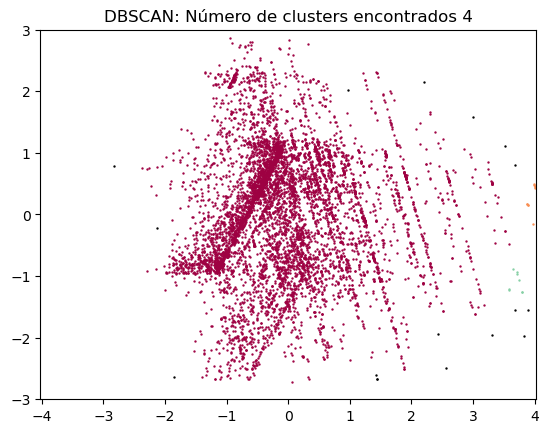

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()


# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - MATURIDADE_MUN

Tendo em vista a utilização de apenas 0,001% dos dados devido às limitações de poder computacional existentes, o gráfico apresentado possui distribuição esparça e uniforme próxima ao eixo "y". Os 3 clusters encontrados não apresentaram resultados conclusivos ao formato dos dados. O posicionamento dos dados indica uma curva de crescimento acentuado próximo ao eixo, o que pode indicar que se comparado ao primeiro gráfico, os dados .